<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data
<br><br>
_Instructor:_ Tim Book, General Assembly DC

_Material adapted from its original author, Joseph Nelson_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

**To get full credit, each code cell must be accompanied by another cell giving plain-English interpretations as if you were speaking to a non-data scientist.** For the cleanest presentation, you should use a markdown cell!

---

## Basic Level

### Part 1: Read in the data.
Print the head of the data.

_Hint:_ This is a TSV (tab-separated value) file, which means each element of the table is separated by a tab (instead of a `,` or `|` like we've seen in class).

_Hint 2:_ The unicode character for tab is `\t`

In [1]:
DATA_FILE = './data/chipotle.tsv'
import numpy as np
import pandas as pd

In [4]:
# Read in the data here.

ch_df = pd.read_csv('./data/chipotle.tsv', sep='\t')
ch_df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Part 2: Whare the top 5 most commonly ordered items?

In [14]:
ch_df.item_name.value_counts().head()

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64

In [138]:
ch_df.item_name.value_counts()


Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

---

## Intermediate Level

### Part 3: Calculate the average price of an order.

_Hint:_ Examine the data to see if the `quantity` column is relevant to this calculation.

_Hint 2:_ String methods can be called via `str`. For example, you might find the following useful:

```python
data.variable.str.replace('xyz', 'abc')
```

_Hint 3:_ Pay close attention to data types here! This is tricky.

In [13]:
avg_price = ch_df.item_price.str.replace('$', '').astype('float').mean()

avg_price

7.464335785374397

### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for items with `item_name` `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`. You're being asked about the variety of sodas in the `choice_description` column.

In [36]:
set(ch_df[ch_df.item_name.str.contains("Canned")]['choice_description'])

{'[Coca Cola]',
 '[Coke]',
 '[Diet Coke]',
 '[Diet Dr. Pepper]',
 '[Dr. Pepper]',
 '[Lemonade]',
 '[Mountain Dew]',
 '[Nestea]',
 '[Sprite]'}

---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [137]:
burritos = ch_df[ch_df.item_name.str.contains('Burrito')]
my_list = list(burritos.choice_description)

topping_count = 0

for item in my_list:
    topping_count += item.count(',')

topping_count/len(my_list)

4.395051194539249

,order_id,quantity,item_name,choice_description,item_price
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25
16,8,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",$8.49
17,9,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",$8.49
21,11,1,Barbacoa Burrito,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",$8.99


## PARTS 6 AND 7 ARE OPTIONAL AND FOR BONUS CREDIT!
_But you should still try them! Really, they're not that hard!_

### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

In [179]:
chip_dict = {}

chips_df = ch_df[ch_df.item_name.str.contains('Chips')]

chips_orders = chips_df.groupby('item_name')['quantity'].sum().to_dict()

chips_orders


{'Chips': 230,
 'Chips and Fresh Tomato Salsa': 130,
 'Chips and Guacamole': 506,
 'Chips and Mild Fresh Tomato Salsa': 1,
 'Chips and Roasted Chili Corn Salsa': 23,
 'Chips and Roasted Chili-Corn Salsa': 18,
 'Chips and Tomatillo Green Chili Salsa': 45,
 'Chips and Tomatillo Red Chili Salsa': 50,
 'Chips and Tomatillo-Green Chili Salsa': 33,
 'Chips and Tomatillo-Red Chili Salsa': 25,
 'Side of Chips': 110}

### Part 7: Create a barplot of the frequencies of the chip orders from part 6.

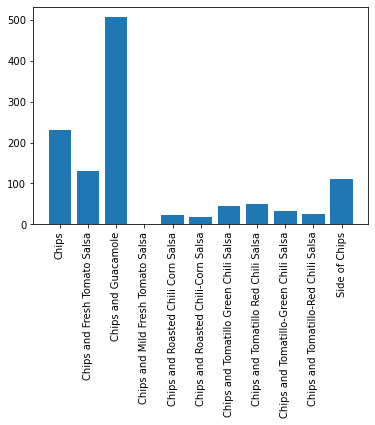

In [178]:
import matplotlib.pyplot as plt

chip_keys = chips_orders.keys()
chip_vals = chips_orders.values()

plt.bar(chip_keys, chip_vals);
plt.xticks(rotation='vertical');